<div style="text-align: center;">
    <hr>
    <h2>Prapemrosesan & Rekayasa Data - IBDA3111</h2>
    <h3>UTS - Students Performance in Exams</h3>
    <h4>Victor Chendra - <b>202000338</b></h4>
    <hr>
</div>

<div>
    <h4>Description: </h4> 
    <ol>
        <li>Masalah yang akan diselesaikan</li>
        <ol type="a">
            <li>How effective is the test preparation course? </li>
            <li>Which major factors contribute to test outcomes? </li>
            <li>What would be the best way to improve student scores on each test? </li>
            <li>What patterns and interactions in the data can you find?</li>
        </ol>
        <br>
        <li>Deskripsi singkat dataset</li>
        <ul style="list-style-type:none;">
            <li>Students Performance in Exams dataset adalah sebuah dataset yang menggambarkan tentang peforma ujian siswa. Dalam dataset berisikan tentang nilai-nilai ujian siswa di sekolah. Adapun tabel-tabel yang terdapat di dalam dataset. (exams.csv)<br><br>
            Terdapat 8 kolom, 5 string 3 integers dan 1000 baris data. Dataset ini ingin memberikan gambaran, apakah pengaruh latar belakang orang tua, persiapan ujian, dan lain-lain terhadap kinerja ujian siswa.
            </li>
        </ul>
        <br>
        <li>Sumber dataset</li>
        <ul style="list-style-type:none;">
            <li>Dataset diperoleh dari kaggle.com <br>
            <a href="https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams">https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams</a></li>
        </ul>
        <br>
        <li>Cara memperoleh dataset</li>
        <ul style="list-style-type:none;">
            <li>Dataset diperoleh dengan cara mengunduh dari website.</li>
        </ul>
    </ol>
</div>


### Library

In [1]:
# Import library needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


### Load and check dataset

In [2]:
# Load dataset
df = pd.read_csv('exams.csv', delimiter=',')

# Show dataset
# pd.set_option('display.max_rows', None) # display all rows dataset
display(df.head(5))

# Dataset shape
print(f"Rows   : {df.shape[0]}\nColumns: {df.shape[1]}")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Rows   : 1000
Columns: 8


In [3]:
# Check the datatype for all the column values
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
# Check unique values columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [5]:
# Let's check if the data has some missing values
print(f"Check if the data has some missing values")
df.isnull().sum()


Check if the data has some missing values


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

↑ There are no missing values in the dataset* ↑

In [6]:
# Let's check if the values of the first 5 columns numerical or categirical
for i in range(5):
    print(f"{df[df.columns[i]].value_counts()}\n")


male      517
female    483
Name: gender, dtype: int64

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

standard        652
free/reduced    348
Name: lunch, dtype: int64

none         665
completed    335
Name: test preparation course, dtype: int64



↑↑↑ We can see from the output above that the first 5 columns are categorical variables. Then, the rest columns are numerical variables.


In [7]:
df.iloc[:, 5:].describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


↑↑ Let's see the statistic presentation using .describe()

c:\Python 3.10.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python 3.10.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python 3.10.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

<AxesSubplot:xlabel='writing score', ylabel='Density'>

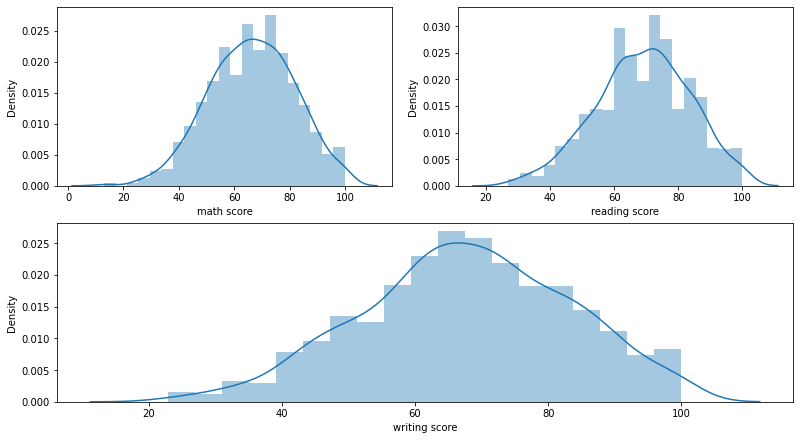

In [8]:
figure, ax = plt.subplots(2,2, constrained_layout=True, figsize=(11, 6))

plt.subplot(2, 2, 1)
sns.distplot(df['math score'])

plt.subplot(2, 2, 2)
sns.distplot(df['reading score'])

plt.subplot(2, 2, (3, 4))
sns.distplot(df['writing score'])

↑ ↑ Let's see the distribution of the scores.

### 1. Data cleaning

##### 1. Delete duplicated rows

In [9]:
# Delete duplicated rows
dups = df.duplicated()
print(f"Duplicated rows:")
print(dups.any())
print(df[dups])

print(f"\nShape before delete:  {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after delete :  {df.shape}\n")


Duplicated rows:
True
    gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  

Shape before delete:  (1000, 8)
Shape after delete :  (999, 8)



##### 2. Identifikasi Pencilan lalu diimputasi ke nilai lower bound

Outlier
    Math score    = [23, 13, 13]
    Writing score = [28, 29, 27, 28, 31, 29]
    Reading score = [24, 23, 26, 23]


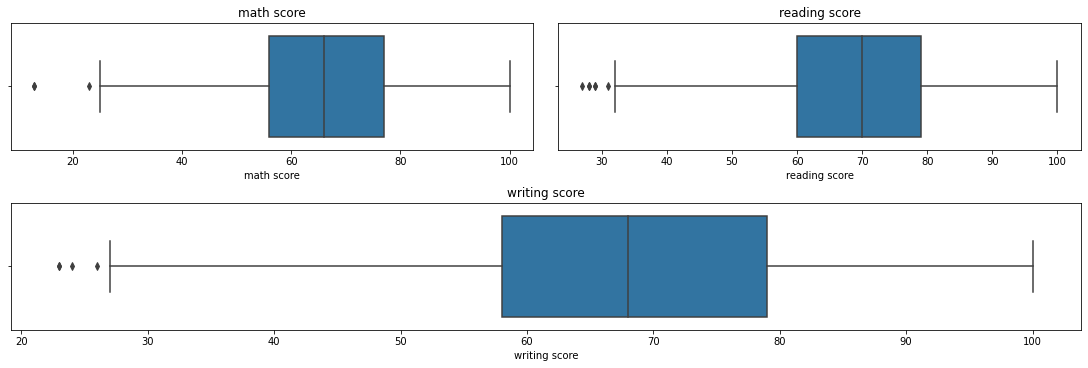

In [10]:
# This func return upper & lower bound from dataset column
def identify_outlier(datacolumn):
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range, upper_range


# Plot to boxplot so we can see the outlier data
def display_boxplot():
    figure, ax = plt.subplots(2,2, constrained_layout=True, figsize=(15, 5))

    s = 1
    for i in range(len(df.columns)):
        if i == 7:
            plt.subplot(2, 2, (s, s+1))
            plt.title(df.columns[i])
            sns.boxplot(x=df.iloc[:, i])
            s += 1
            continue

        if i >= 5:        
            plt.subplot(2, 2, s)
            plt.title(df.columns[i])
            sns.boxplot(x=df.iloc[:, i])
            s += 1


# Take the bounderies value 
math_score = identify_outlier(df.iloc[:, 5])
reading_score = identify_outlier(df.iloc[:, 6])
writing_score = identify_outlier(df.iloc[:, 7])

# Capture outlier (lower bound)
outlier_ms = [x for x in df.iloc[:, 5] if x < math_score[0]]
outlier_rs = [x for x in df.iloc[:, 6] if x < reading_score[0]]
outlier_ws = [x for x in df.iloc[:, 7] if x < writing_score[0]]

print(f"Outlier")
print(f"    Math score    = {outlier_ms}")
print(f"    Writing score = {outlier_rs}")
print(f"    Reading score = {outlier_ws}")

display_boxplot()


↑↑ From boxplot above.. we can see that there is an outlier in our dataset

Outlier
    Math score    = []
    Writing score = []
    Reading score = []


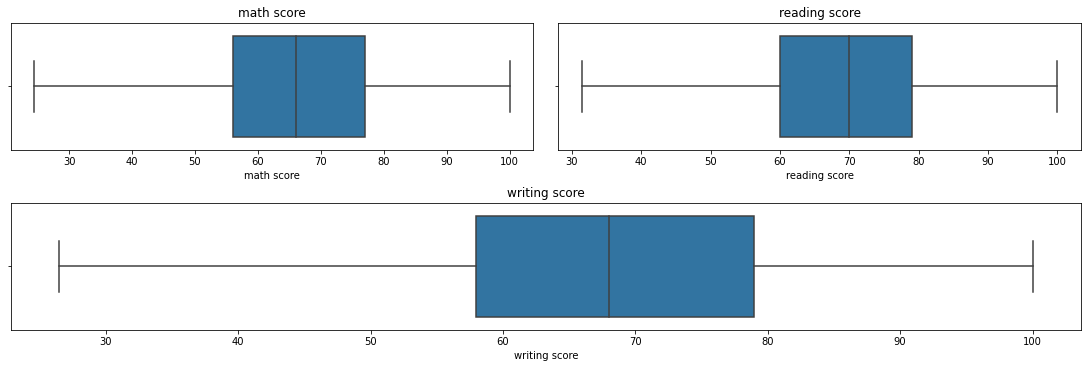

In [11]:
# Function to impute to our dataset
def impute_outlier_to_lower_bound_value(df: pd.DataFrame, bounderies: tuple, n_col: int):
    for i in range(df.shape[0]):
        if df.iloc[i, n_col] <= bounderies[0]:
            df.iloc[i, n_col] = bounderies[0]
    return

impute_outlier_to_lower_bound_value(df, math_score, 5)
impute_outlier_to_lower_bound_value(df, reading_score, 6)
impute_outlier_to_lower_bound_value(df, writing_score, 7)

# Take the bounderies value 
math_score = identify_outlier(df.iloc[:, 5])
reading_score = identify_outlier(df.iloc[:, 6])
writing_score = identify_outlier(df.iloc[:, 7])

# Capture outlier (lower bound)
outlier_ms = [x for x in df.iloc[:, 5] if x < math_score[0]]
outlier_rs = [x for x in df.iloc[:, 6] if x < reading_score[0]]
outlier_ws = [x for x in df.iloc[:, 7] if x < writing_score[0]]

print(f"Outlier")
print(f"    Math score    = {outlier_ms}")
print(f"    Writing score = {outlier_rs}")
print(f"    Reading score = {outlier_ws}")

display_boxplot()


↑ ↑ Now, we have done imputing the outlier data to it's lower bound value (so no more outlier)

We impute the outlier to it's lower bound because there are just a few outlier and we need it, so we don't delete the outlier data

### 2. Features selection

Create new column indicate pass or fail (1: pass, 0: fail)

In [12]:
# I create a function for one hot encoding and rename the encoded column so it's name is short
def one_hot_encoding():
    global df
    encoded = pd.get_dummies(df.iloc[:, :5])

    def rename_column_after_one_hot_encoding():
        new_name ={}
        for i in range(len(encoded.columns)):
            new_name[encoded.columns[i]] = encoded.columns[i].split("_")[1]

        encoded.rename(columns=new_name, inplace=True)
    
    rename_column_after_one_hot_encoding()
    
    j = -3
    for i in range(3):
        encoded[df.iloc[:, -3:].columns[i]] = df.iloc[:, j]
        j +=1
    
    df = encoded


# Save it for later
save_it = df.iloc[:, -3:]

# Adding new column indicates pass or not the exams
# if it's under 50, it's fail else they pass the test
df['math_PassStatus'] = np.where(df['math score']<50, 0, 1)
df['read_PassStatus'] = np.where(df['reading score']<50, 0, 1)
df['write_PassStatus'] = np.where(df['writing score']<50, 0, 1)

df.drop(['math score'], axis=1, inplace=True)
df.drop(['reading score'], axis=1, inplace=True)
df.drop(['writing score'], axis=1, inplace=True)


In [13]:
# Display dataset before one hot encoding (after data cleaning,\
    # after adding new column indicator)
display(df.head(3))
df.shape


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_PassStatus,read_PassStatus,write_PassStatus
0,male,group A,high school,standard,completed,1,1,1
1,female,group D,some high school,free/reduced,none,0,1,1
2,male,group E,some college,free/reduced,none,1,1,1


(999, 8)

In [14]:
# Make sure to run it just ONCE otherwise, you need to run it all again from begining
one_hot_encoding()
display(df.head(3))
df.shape


,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none,math_PassStatus,read_PassStatus,write_PassStatus
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1
1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1


(999, 20)

↑ ↑ Done One Hot Encoding ✔

In [15]:
df.drop(["female"], axis=1, inplace=True)
df.drop(["free/reduced"], axis=1, inplace=True)
df.drop(["none"], axis=1, inplace=True)

display(df.head(3))
df.shape

,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,standard,completed,math_PassStatus,read_PassStatus,write_PassStatus
0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1


(999, 17)

↑ ↑ Drop the redundant column that only have unique value 2 (1 or 0)

We manually drop the column because it's only represent 2 unique values. So if we delete the it, it still represent the dataset itself

In [16]:
"""
This templates function is given from my teacher's jupyter notebook "RFE.ipynb" / from books "Data Preparation for
Machine Learning - Jason Brownlee"
"""

# get a list of models to evaluate
def get_models(X, y, n: int):
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['lin reg'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['rand forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


> lin reg 0.830 (0.025)
> cart 0.818 (0.028)
> perceptron 0.827 (0.024)
> rand forest 0.818 (0.027)
> gbm 0.827 (0.022)


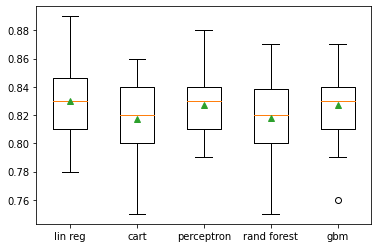

In [17]:
# Split dataset 
X = df.iloc[:, :-3]
y1 = df.iloc[:, -3]
y2 = df.iloc[:, -2]
y3 = df.iloc[:, -1]
output = [y1, y1, y3]

# evaluate the models and store results
n_features_to_select = 11
models = get_models(X, output[0], n_features_to_select)

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, output[0])
    results.append(scores)
    names.append(name)
    print('> %s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison    
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


↑ ↑ As we can see.. perceptron has the highest accuracy, so we take perceptron model as our estimator

In [18]:
def get_model_perceptron(X, y, n: int):
    models = dict()
    rfe = RFE(estimator=Perceptron(), n_features_to_select=n)
    model = DecisionTreeClassifier()
    models['perdeptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    rfe.fit(X, y)
    return models, rfe.support_, rfe.ranking_


percp = get_model_perceptron(X, output[0], n_features_to_select)


In [19]:
print(percp[1])
print(percp[2])

[False False False  True  True  True  True  True  True  True  True  True
  True  True]
[2 4 3 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
# selected_fetures = [zip(i, s) for i, s in enumerate(percp[1]) if percp[i]]
# selected_fetures

selected_fetures = []
for i, s in enumerate(percp[1]):
    if s:
        selected_fetures.append(i)

selected_fetures


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [21]:
df_selected_features = df.iloc[:, selected_fetures]
df_selected_features


,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,standard,completed
0,0,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,1,0,0,0,1,0
996,0,1,0,1,0,0,0,0,0,0,1
997,1,0,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,0,0,1,0,1,0


In [22]:
# # Kode berikut membangkitkan data acak multidimensi
# x = df.iloc[:, -3:-1]
# y = df.iloc[:, -1]

# d = {
#     "math score" : df.iloc[:, -3],
#     "reading score" : df.iloc[:, -2],
#     "writing score":df.iloc[:, -1]
# }

# # Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
# sns.set_style("whitegrid")
# sns.pairplot(df[list(df.columns)])
